In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
mt5_small_lang_projs = np.load("./mt5-small_lang_model_projections_nneighbors=10.npy", allow_pickle=True).item()

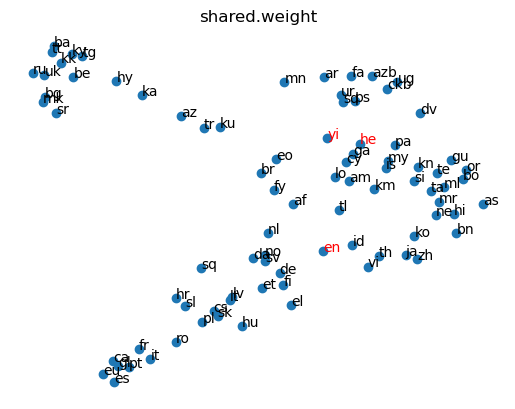

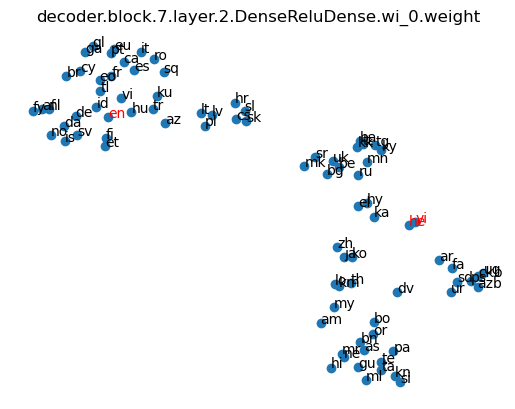

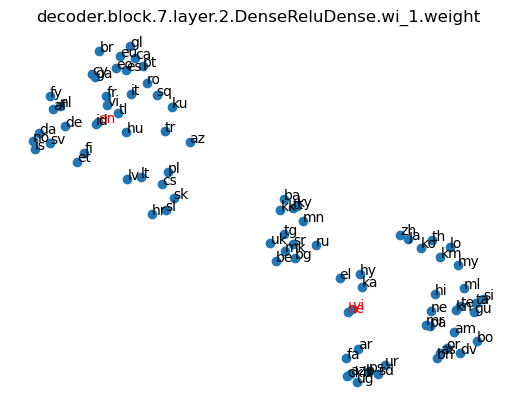

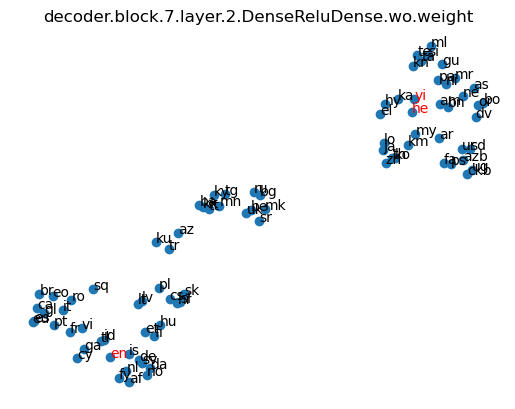

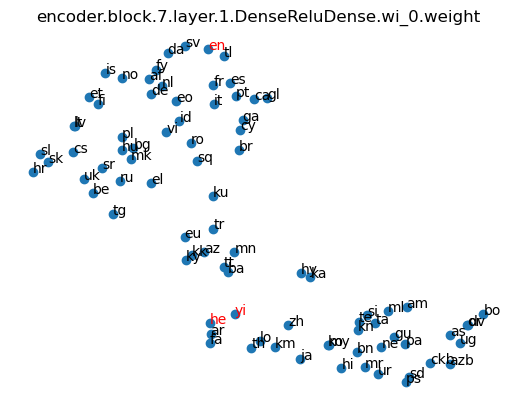

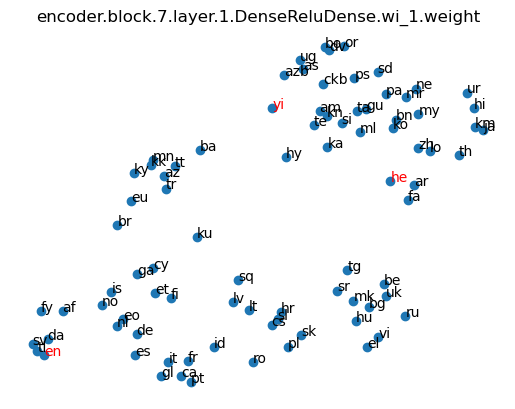

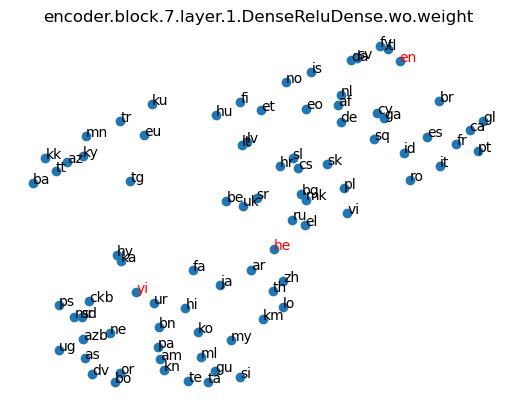

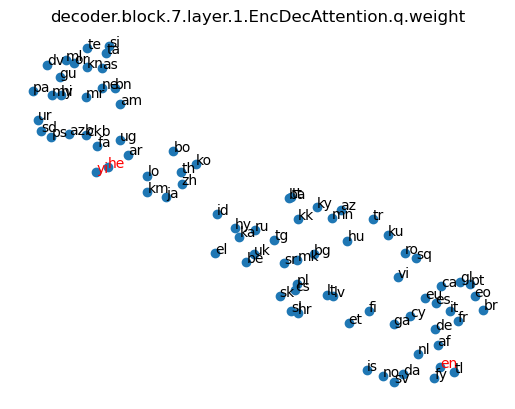

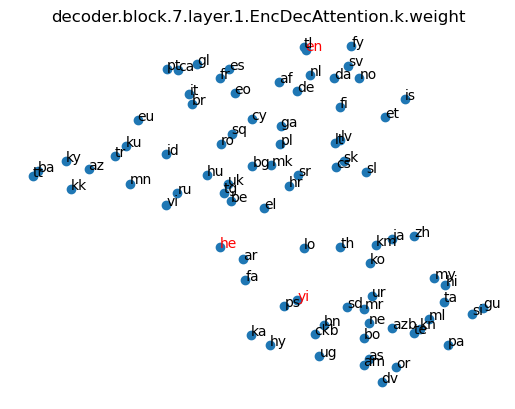

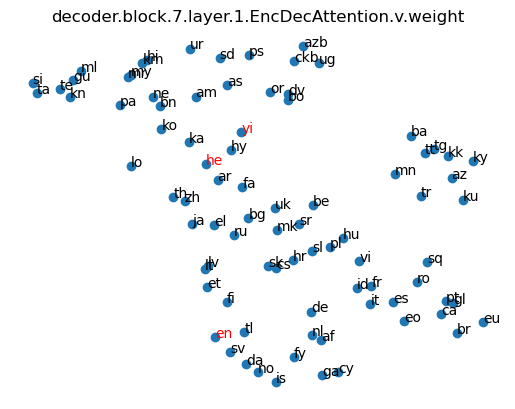

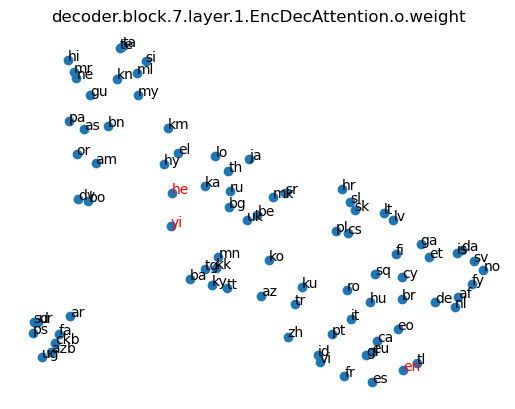

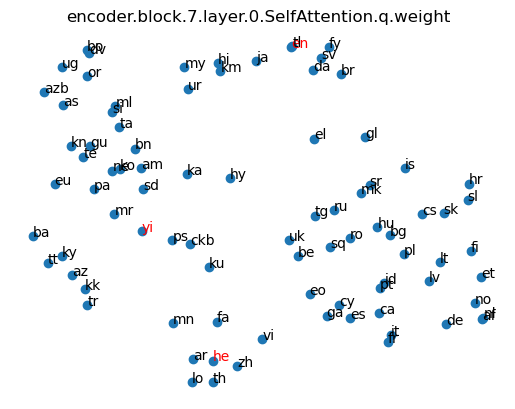

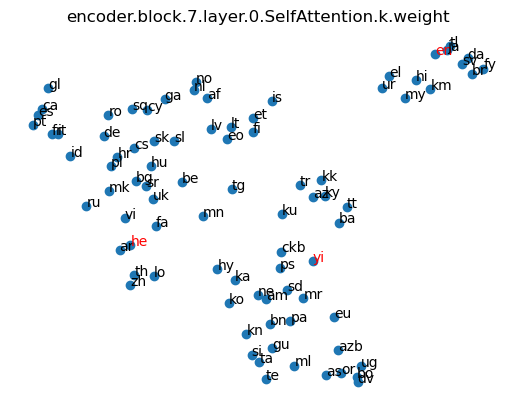

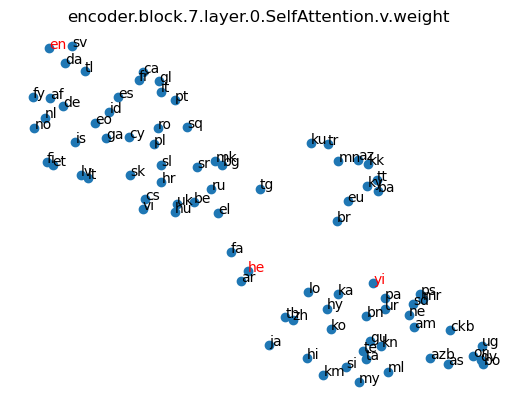

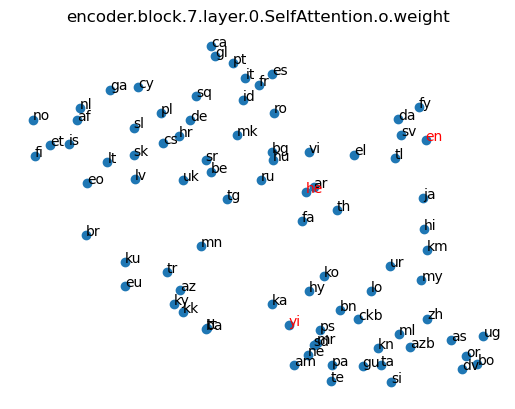

In [5]:
pt_langs = mt5_small_lang_projs["model_langs"]
for param, proj_pts in mt5_small_lang_projs.items():
    if param != "model_langs":
        plt.scatter(proj_pts[:, 0], proj_pts[:, 1])#, c=list(range(len(proj_pts))), cmap="hsv")
        for i, lang in enumerate(pt_langs):
            if lang in ["yi", "he", "en"]:
                plt.annotate(lang, (proj_pts[i, 0], proj_pts[i, 1]), c="red")
            else:
                plt.annotate(lang, (proj_pts[i, 0], proj_pts[i, 1]))
        
        plt.title(param)
        plt.axis('off')
        plt.show()
